In [2]:
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [3]:
df_bajas = pd.read_feather('../../../data/processed/BAJAS_X_CIF_ID.feather')

/home/voolkia/anaconda3/envs/test/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


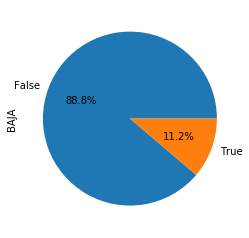

In [6]:
df_bajas["BAJA"].value_counts().plot.pie(autopct='%1.1f%%')

## Check Bajas in PROSPECT 

In [5]:
df_prospect = pd.read_feather('../../../data/interim/prospect.feather')

In [45]:
len(df_bajas)

847206

In [44]:
len(df_prospect[df_prospect["CIF_ID"].isin(df_bajas["CIF_ID"])])

7658

In [32]:
len(set(df_prospect["CIF_ID"]).intersection(set(df_bajas["CIF_ID"]))) 

7658

In [21]:
df_prospect.rename(columns={"ID": "CIF_ID"}, inplace=True)

In [22]:
df_prospect.isna().mean().sort_values(ascending=False)

DATMAR_ACT_F_CANTIDAD_HIJOS       0.931329
DATMAR_CANTIDAD_HIJOS             0.930779
DOMICILIO_OBSERVACIONES           0.928969
ACT_U_TELEFONOS                   0.916839
ACT_F_TELEFONOS                   0.916839
CONFIRMADO_FNAC                   0.914409
DOMICILIO_LONGITUD                0.897139
DOMICILIO_LATITUD                 0.897139
DOMICILIO_NUMERO                  0.855769
DOMICILIO_CALLE                   0.850859
DOMICILIO_CODIGO_POSTAL           0.842298
DATMAR_NIVEL_EDUCACION            0.830868
DATMAR_ACT_F_NIVEL_EDUCACION      0.829318
DATECO_AUTONOMO                   0.822098
DATECO_ACT_F_AUTONOMO             0.820538
DATECO_ACT_U_TIPO_ACTIVIDAD       0.819918
DATECO_ACT_F_TIPO_ACTIVIDAD       0.819918
DATECO_TIPO_ACTIVIDAD             0.818258
TELEFONO_CEL_ID                   0.813468
DATMAR_COMPLETO_ESTUDIOS          0.812968
DATMAR_ACT_F_COMPLETO_ESTUDIOS    0.811368
DATECO_TRABAJA                    0.807838
DATECO_ACT_F_TRABAJA              0.806248
PADRON     

In [29]:
df_bajas[df_bajas["CIF_ID"] == 781234]

,CIF_ID,BAJA


In [26]:
df_merged = pd.merge(df_prospect, df_bajas, how='left', on="CIF_ID")

In [43]:
df_merged["BAJA"].notna().sum()  

7658

## Check Bajas in INTERACCIONES

In [1]:
df_int = pd.read_csv('../../../data/raw/TB_INTERACCIONES.tsv',sep="\t",encoding="latin-1",usecols=["CIF_ID"])

NameError: name 'pd' is not defined

In [5]:
len(df_bajas) * 0.8377053514729593

709709.0

In [12]:
len(set(df_bajas["CIF_ID"]).intersection(set(df_int["CIF_ID"].unique()))) / len(df_bajas)

0.8377053514729593

In [13]:
len(set(df_bajas["CIF_ID"]).intersection(set(df_int["CIF_ID"].unique()))) / len(df_int["CIF_ID"].unique())

0.3339156512566493

In [ ]:
df_int = pd.read_feather('../../../data/interim/interacciones.feather')

## Check POLIZAS in PAGOS

In [7]:
df_polizas = pd.read_feather('../../../data/interim/polizas.feather')

/home/voolkia/anaconda3/envs/test/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [10]:
df_pagos = pd.read_feather('../../../data/interim/pagos.feather')

In [17]:
fechas = [col for col in df_pagos.columns if 'FECHA' in col]
data = {}
for col in fechas:
    data[col] = [df_pagos[col].min(),df_pagos[col].max()]
pd.DataFrame(data, index =['MIN', 'MAX'])

,FECHA_EQUIPO,FECHA_VTO
MIN,2019-03-01,1996-12-01
MAX,2099-12-19,2020-11-01


In [11]:
len(df_polizas["NUM_SECU_POL"].unique())

4003775

In [12]:
len(df_pagos["NUM_SECU_POL"].unique())

3272921

In [9]:
len(set(df_polizas["NUM_SECU_POL"].unique()).intersection(set(df_pagos["NUM_SECU_POL"].unique()))) / len(df_polizas["NUM_SECU_POL"].unique())

0.2703373691079044